In [ ]:
# !pip install fancyimpute==0.7.0
!pip install imblearn==0.0
!pip install joblib==1.0.1
!pip install matplotlib==3.3.4
!pip install numpy==1.19.5
!pip install pandas==1.3.5
!pip install scikit_learn
!pip install scipy==1.6.2
!pip install seaborn==0.11.1
!pip install six==1.15.0
!pip install xgboost==1.5.1
!pip install fancyimpute 

# Loan Eligibility Prediction using Gradient Boosting Classifier

This data science in python project predicts if a loan should be given to an applicant or not. We predict if the customer is eligible for loan based on several factors like credit score and past history. 

## Project Description

SYL bank is one of Australia's largest banks. Currently, the loan applications which come in to their various branches are processed manually. The decision whether to grant a loan or not is subjective and due to a lot of applications coming in, it is getting harder for them to decide the loan grant status. Thus, they want to build an automated machine learning solution which will look at different factors and decide whether to grant loan or not to the respective individual.

In this ML problem, we will building a classification model as we have to predict if an applicant should get a loan or not. We will look at various factors of the applicant like credit score, past history and from those we will try to predict the loan granting status. We will also cleanse the data and fill in the missing values so that our ML model performs as expected. Thus we will be giving out a probability score along with Loan Granted or Loan Refused output from the model.


## Dataset Description
In this dataset, you must explore and cleanse a dataset
consisting of over 1,00,000 loan records to determine the
best way to predict whether a loan applicant should be
granted a loan or not. You must then build a machine
learning model that returns the unique customer ID and a
loan status label that indicates whether the loan should be
given to that individual or not.

- Loan ID: A unique Identifier for the loan information.
- Customer ID: A unique identifier for the customer.
Customers may have more than one loan.
- Loan Status: A categorical variable indicating if the
loan was given to this customer
- Current Loan Amount: This is the loan amount
that was either completely paid off, or the amount that
was defaulted. This data is for previous loan
- Term: A categorical variable indicating if it is a short
term or long term loan.
- Credit Score: A value between 0 and 800 indicating
the riskiness of the borrower’s credit history.
- Years in current job: A categorical variable indicating
how many years the customer has been in their current job.
- Home Ownership: Categorical variable indicating home
ownership. Values are "Rent", "Home Mortgage", and
"Own". If the value is OWN, then the customer is a home
owner with no mortgage
- Annual Income: The customer's annual income
- Purpose: A description of the purpose of the loan.
- Monthly Debt: The customer's monthly
payment for their existing loansYears of Credit
- History: The years since the first entry in the
customer’s credit history.
- Months since last delinquent: Months since the last loan
delinquent payment
- Number of Open Accounts: The total number of open credit cards
- Number of Credit Problems: The number of credit
problems in the customer records.
- Current Credit Balance: The current total debt for the customer
- Maximum Open Credit: The maximum credit limit
for all credit sources.
- Bankruptcies: The number of bankruptcies
- Tax Liens: The number of tax liens.


## Evaluation criteria
To achieve a passing grade, the accuracy of the model
has to be at least 70 (percent).

In [ ]:
from fancyimpute import KNN, SoftImpute

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier, PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib

%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import operator

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [ ]:
from sklearn.utils import _safe_indexing
sys.modules['sklearn.utils.safe_indexing'] = sklearn.utils._safe_indexing

In [ ]:
from imblearn.over_sampling import SMOTE

# Read Data

In [ ]:
#Importing the datasets
data =pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/358/LoansTrainingSetV2.csv")

In [ ]:
#Importing the datasets
data =pd.read_csv("https://s3.amazonaws.com/hackerday.datascience/358/LoansTrainingSetV2.csv", low_memory=False)

In [ ]:
data.head()
len(data)

111107

In [ ]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [ ]:
data.duplicated(subset="Loan ID").sum()

22197

In [ ]:
##Drop the duplicates with respect to LOAN ID
data.drop_duplicates(subset="Loan ID",keep='first',inplace=True)

In [ ]:
111107-data.shape[0]

22197

# **EDA**

## Loan Status Plot (Target Feature EDA )

In [ ]:
data['Loan Status'].value_counts()

Loan Given      63737
Loan Refused    25173
Name: Loan Status, dtype: int64

In [ ]:

data["Loan Status"].value_counts(normalize=True)

Loan Given      0.716871
Loan Refused    0.283129
Name: Loan Status, dtype: float64

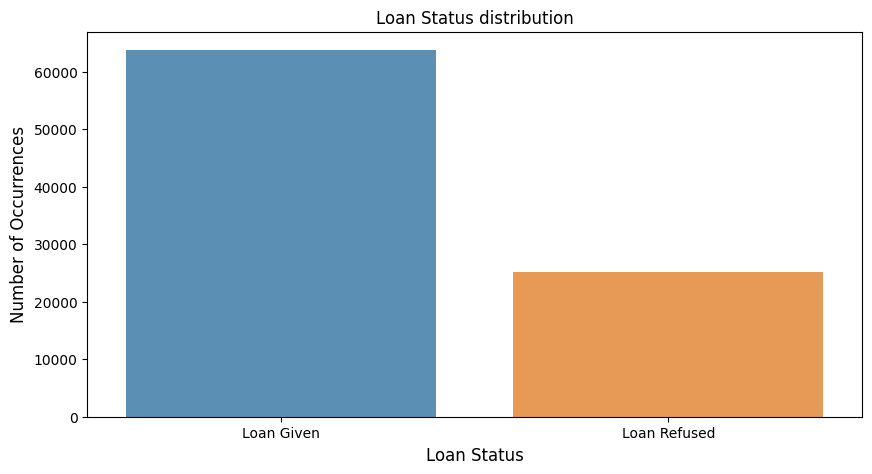

In [ ]:
# PLotting the loan status 
status=data["Loan Status"].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(x = status.index, y = status.values, alpha=0.8)
plt.title('Loan Status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show()

## Current Loan Amount Feature EDA

In [ ]:
data["Current Loan Amount"].describe()

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

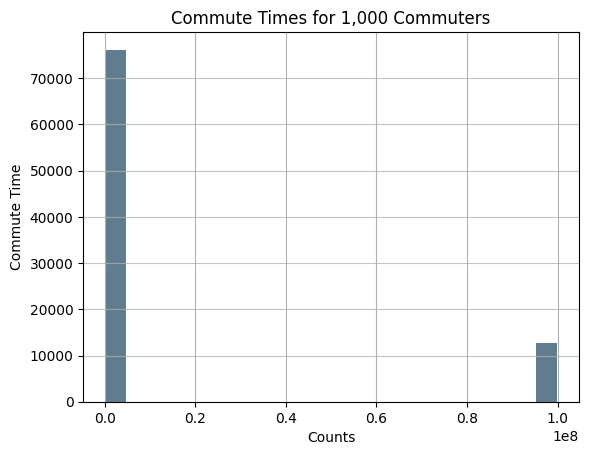

In [ ]:
###Current Loan Amount ############
data["Current Loan Amount"].describe()


data["Current Loan Amount"].plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6702276280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f67022767c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6701e4afa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6702276d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6702276fa0>],
 'means': []}

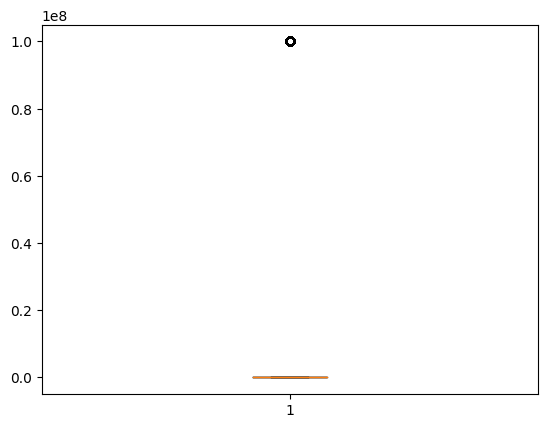

In [ ]:
plt.boxplot(data["Current Loan Amount"])

Current Loan Amount column has certain outliers..

So handle outlier in this feature by Quantile method..

In [ ]:
#Finding IQR's for outlier removal

Q1 = data["Current Loan Amount"].quantile(0.25)  # 25th qurtile
Q3 = data["Current Loan Amount"].quantile(0.75)  # 75th quartile
IQR = Q3 - Q1
print(IQR)

16202.0


In [ ]:
data["Current Loan Amount"][((data["Current Loan Amount"] < (Q1 - 1.5 * IQR)) |(data["Current Loan Amount"] > (Q3 + 1.5 * IQR)))]


5044     99999999
5045     99999999
5046     99999999
5047     99999999
5048     99999999
           ...   
17777    99999999
17778    99999999
17779    99999999
17780    99999999
17781    99999999
Name: Current Loan Amount, Length: 12738, dtype: int64

12738 numbers of outliers and values is 99999999.
We know this are not the Real value.
So we try to replace this value by single value OR Distribution Imputation at the end..
we try here formal methodology, to fill this value by single value.

In [ ]:
temp=np.array(data["Current Loan Amount"].values.tolist())
data["Current Loan Amount_temp"] = np.where(temp > 9999998, 'NaN', temp).tolist() # convert That bad value with NaN


count    76172.000000
mean     13933.915756
std       8235.921922
min        491.000000
25%       7810.000000
50%      12038.000000
75%      19351.000000
max      35875.000000
Name: Current Loan Amount_temp, dtype: float64

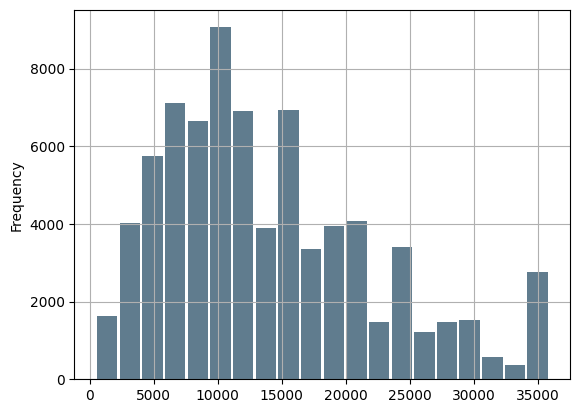

In [ ]:
# filter the data, whith dont have NaN value in newly created temp column
# And check Histogram for other values in that column
# and also check distribution for Current loan Amount ( that not present that bad value)
# and we decide to replace that value with one value
# so we can select 50th percentile of the column ( can choose any other also....)

temp = data["Current Loan Amount_temp"][data["Current Loan Amount_temp"]!='NaN'].astype(str).astype(int)
temp.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
                   
temp.describe()


In [ ]:
#Replacing the data with 50% percentile ( 12038 ) or mean 
temp=np.array(data["Current Loan Amount"].values.tolist())
data["Current Loan Amount"] = np.where(temp > 9999998, 12038, temp).tolist()

data=data.drop(['Current Loan Amount_temp'],axis=1)

## Term Feature EDA

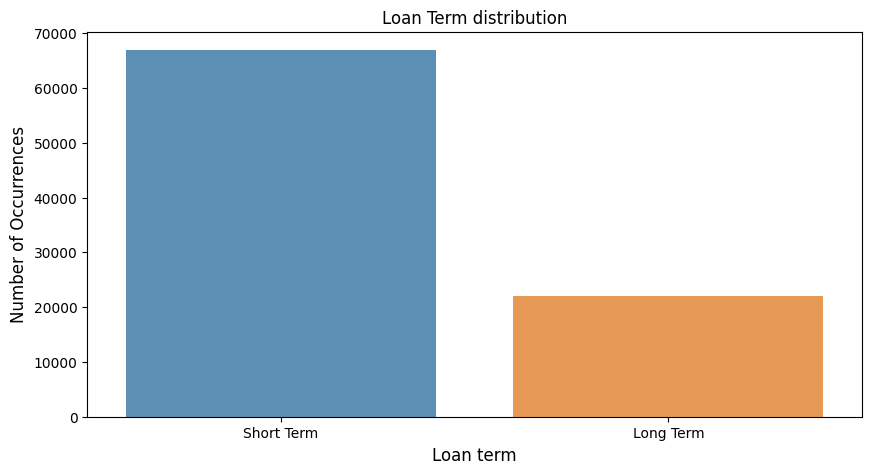

In [ ]:
status=data["Term"].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Term distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan term', fontsize=12)
plt.show()


Short Term has maximum count than Long Lerm Loans

## Credit Score Feature DEA

{'whiskers': [<matplotlib.lines.Line2D at 0x7f67057ca9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f67057caf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f67057ca730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f670587e490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f670587e730>],
 'means': []}

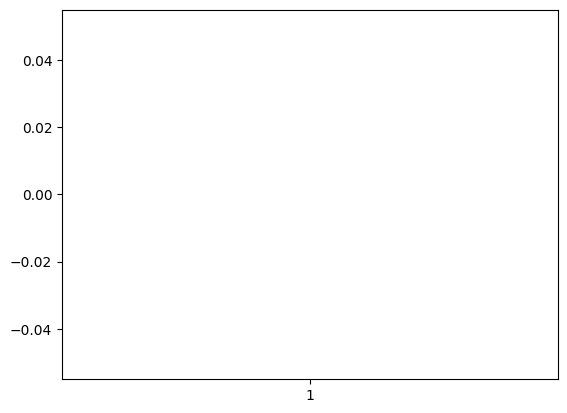

In [ ]:
data["Credit Score"].describe()
##Max is 7510. It should be between 0-800
plt.boxplot(data["Credit Score"])


While plot boxplot error means there are some missing values present in feature

In [ ]:
data["Credit Score"].isnull().sum()


21338

In [ ]:
data["Credit Score"].describe()

count    67572.000000
mean      1199.199580
std       1680.813805
min        585.000000
25%        714.000000
50%        733.000000
75%        744.000000
max       7510.000000
Name: Credit Score, dtype: float64

Asume credit score max value is 800, so from above description there is error in data

In [ ]:
data[data["Credit Score"]>800]["Credit Score"].unique() # all value greate than 800 is multiple of 10

array([7280., 7330., 7240., 7400., 6860., 7420., 6630., 7360., 6720.,
       7010., 7310., 6850., 6280., 7470., 7200., 7320., 6820., 7230.,
       6740., 7350., 7430., 7170., 7370., 7180., 7440., 6680., 7130.,
       6510., 6970., 6950., 6410., 6610., 7160., 7260., 7290., 6620.,
       7480., 6830., 7080., 7380., 6320., 7490., 7140., 7340., 6710.,
       7040., 7500., 6880., 6990., 6590., 6110., 6300., 6520., 6450.,
       7460., 6100., 7060., 6780., 7020., 7090., 6840., 6600., 6220.,
       6800., 6920., 7000., 7050., 7390., 6770., 6810., 7120., 6750.,
       6910., 6930., 6570., 6870., 7220., 6480., 7070., 6290., 6660.,
       6980., 6260., 6390., 7210., 7450., 7250., 6640., 7410., 6140.,
       6560., 6760., 6730., 7100., 7190., 6890., 7300., 6900., 6960.,
       7030., 7510., 6940., 7150., 6700., 6530., 6270., 7110., 6440.,
       6420., 6010., 6350., 6670., 5930., 6790., 6490., 7270., 5890.,
       6180., 6690., 6330., 6380., 6230., 6650., 6210., 6580., 6060.,
       6130., 6080.,

In [ ]:
# Now lets do treatment of the data at hand. 
# Let us firstly divide the values greater than 800 by 10

data["Credit Score"]=np.where(data["Credit Score"]>800, data["Credit Score"]/10, data["Credit Score"])


685.0


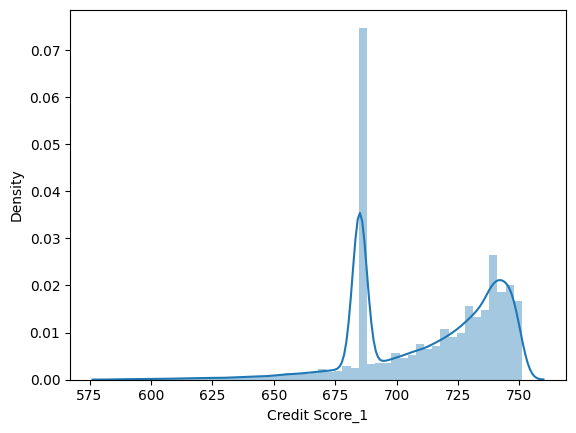

In [ ]:
#Now lets replace the missing values with median 
median_score=statistics.median(data["Credit Score"])
print(median_score)

data["Credit Score_1"] = data["Credit Score"]
data["Credit Score_1"].fillna(median_score, inplace = True) 

sns.distplot(data["Credit Score_1"])
plt.show()

- As we can see this data is skewed so when we replace it with median it is giving us problems. 
- Replacing with 75th percentile and taking log we get a better distribution

In [ ]:
data["Credit Score"].quantile(0.75)         # 75th percentile

741.0

<Axes: xlabel='Credit Score', ylabel='Density'>

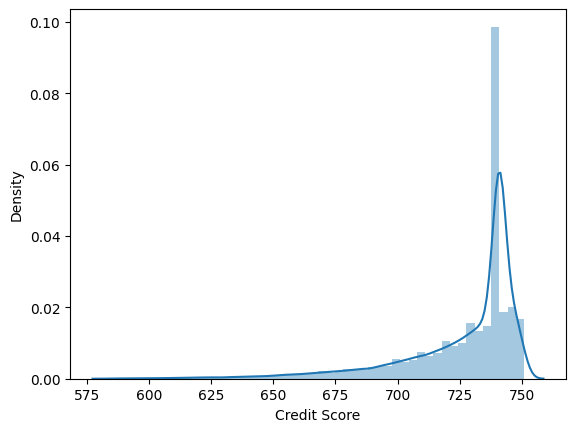

In [ ]:
data["Credit Score"].fillna(741, inplace = True) 

sns.distplot(data["Credit Score"])


<Axes: xlabel='Credit Score', ylabel='Density'>

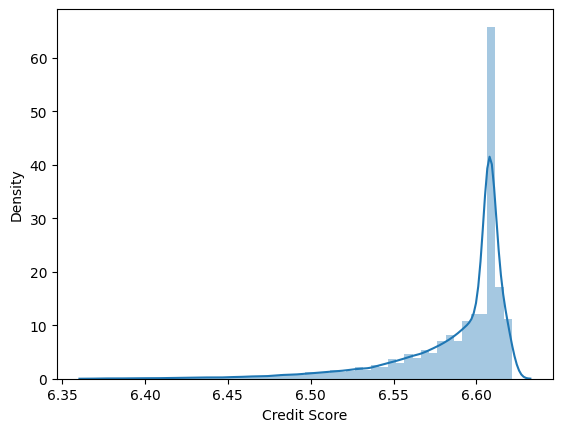

In [ ]:
sns.distplot(np.log(data["Credit Score"]))

Data distribution for Credit Score is not normal so Imputation is not Good...

Instead of imputing with single value, check all other feature associate with this feature and then missing value in this ( Credit Score ) feature imputing with the help of some imputing algorithm

## Home Ownership Feature EDA

In [ ]:
data['Home Ownership'].value_counts()

Home Mortgage    43270
Rent             37395
Own Home          8075
HaveMortgage       170
Name: Home Ownership, dtype: int64

In [ ]:
data['Home Ownership'].unique()
#As we can see it has Home Mortgage and haveMortgage as 2 different classes. Lets fix that
# HaveMortgage no mean, it should be Home Mortgage

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [ ]:
# regex=True if any case in sentance capital or small replace with given value
data['Home Ownership'] = data['Home Ownership'].str.replace('HaveMortgage', 'Home Mortgage', regex=True)

data['Home Ownership'].unique()


array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

## Annual Income Feature EDA


In [ ]:
# contineous feature
data['Annual Income'].describe()


count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [ ]:
##Lets look at the quantiles of this columns ( percentage )

data['Annual Income'].quantile([.2,0.75,0.90,.95,0.99,.999])


0.200     40764.00
0.750     86750.25
0.900    119916.00
0.950    147645.00
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

In [ ]:
#As we can see they lie in the 99th percentile of the data. is very max value 
# Replace them Capping any values greater than 99% to 99th value

data.loc[data['Annual Income'] > 239287, 'Annual Income'] = 239287



In [ ]:
data['Annual Income'].isna().sum()

#So we have about 21000 null values 

21338

## Loan Purpose Feature EDA

In [ ]:
data['Purpose'].value_counts()
#So other and Other mean the same thing. Lets make it the same


Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

In [ ]:
# Replace string Other  -> other
data['Purpose']=data['Purpose'].str.replace('Other', 'other', regex=True)

In [ ]:
data['Purpose'].value_counts()

Debt Consolidation      70447
other                    7767
Home Improvements        5206
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

## Monthly debt Feature EDA

In [ ]:
# Monthly debt Contineous Feature

data['Monthly Debt'].describe()
##So this is not numeric column. Lets explore


count     88910
unique    70066
top           0
freq         69
Name: Monthly Debt, dtype: object

In [ ]:
data['Monthly Debt'] 
# But this should be a numeric column. So lets convert it to float


0         777.39
1         892.09
2        1244.02
3         990.94
4         503.71
          ...   
88905     567.62
88906    2508.63
88907      818.2
88908     360.17
88909     749.13
Name: Monthly Debt, Length: 88910, dtype: object

since it is numeric column it shows dtype: object

In [ ]:
#pd.to_numeric(data['Monthly Debt'] )
# ValueError: Unable to parse string "$1051.41" at position 10
#As we can see there is a $ symbol present. Lets replace it 


In [ ]:
data['Monthly Debt'].dtype

dtype('O')

<Axes: xlabel='Monthly Debt', ylabel='Density'>

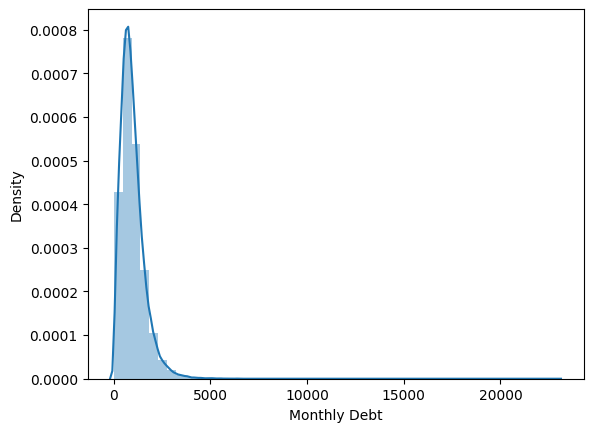

In [ ]:
# first temporary convert column to string and then replace $ symbol to Blank
data['Monthly Debt']=data['Monthly Debt'].str.replace('$', '', regex=True)

# then convert return to numeric column
data['Monthly Debt']=pd.to_numeric(data['Monthly Debt'] )

sns.distplot(data["Monthly Debt"])


In [ ]:
#We can see that there are outliers in this data because of the plot

data['Monthly Debt'].describe()


#The max value is too high here


count    88910.000000
mean       963.102059
std        637.524064
min          0.000000
25%        532.220000
50%        843.925000
75%       1250.527500
max      22939.120000
Name: Monthly Debt, dtype: float64

In [ ]:
# 843/532  # 1.5845864661654134
# 1250/843  # 1.482799525504152
# 22939/1250  # 75% and max vale 18.3512 times higher

In [ ]:
data['Monthly Debt'].quantile([.2,0.75,0.90,.95,0.99,.999])


0.200     463.75000
0.750    1250.52750
0.900    1743.08300
0.950    2115.51100
0.990    3087.11100
0.999    4926.37475
Name: Monthly Debt, dtype: float64

In [ ]:
#Problem is with 99th percentile. lets dig deeper

data['Monthly Debt'].quantile([0.9995,.9999])
#So problem again is wit 99th percentile


0.9995    5482.111455
0.9999    7774.610660
Name: Monthly Debt, dtype: float64

In [ ]:
data['Monthly Debt'].quantile([0.9997,.99999])
#0.99970     5978.574911
#0.99999    13262.762330


0.99970     5978.574911
0.99999    13262.762330
Name: Monthly Debt, dtype: float64

In [ ]:
data['Monthly Debt'].quantile([0.999,1])


0.999     4926.37475
1.000    22939.12000
Name: Monthly Debt, dtype: float64

<Axes: xlabel='Monthly Debt', ylabel='Density'>

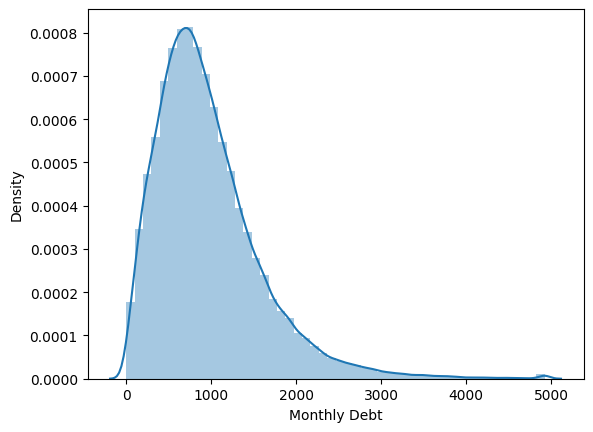

In [ ]:
#Need to replace any value greater than this (0.999 quantile value) with this value 
data.loc[data['Monthly Debt'] > 4926, 'Monthly Debt'] = 4926

sns.distplot(data["Monthly Debt"])
#Now we get the right distribution


## Years of credit history Feature EDA

In [ ]:
# Years of credit history Continuous feature

data['Years of Credit History'].describe()


count    88910.000000
mean        18.315313
std          7.049175
min          3.600000
25%         13.500000
50%         17.000000
75%         21.800000
max         70.500000
Name: Years of Credit History, dtype: float64

In [ ]:
data['Years of Credit History'].quantile([0.80, 0.90, 0.95, 0.99])

0.80    23.1
0.90    27.9
0.95    31.9
0.99    40.5
Name: Years of Credit History, dtype: float64

In [ ]:
data[data['Years of Credit History']>40.5]['Years of Credit History'].unique()

array([40.8, 45.5, 48. , 42.6, 44.2, 42.4, 43. , 49.5, 43.8, 49.3, 46.8,
       58. , 41.5, 48.3, 42.5, 42.3, 40.6, 51.9, 47.8, 41.3, 49. , 46. ,
       52. , 41.9, 48.9, 43.7, 45. , 44. , 47.4, 46.7, 44.5, 51.7, 42.2,
       46.5, 43.3, 41.4, 43.4, 45.2, 41. , 50.4, 46.3, 42.9, 44.4, 44.1,
       42. , 52.5, 41.1, 50.6, 45.4, 40.9, 52.9, 42.8, 44.6, 46.9, 41.8,
       46.2, 49.9, 47. , 43.9, 45.6, 45.8, 50.1, 53.1, 46.4, 43.2, 42.7,
       55.8, 42.1, 43.5, 57.7, 41.2, 51.6, 46.6, 59.5, 48.6, 49.6, 50.3,
       40.7, 50.9, 50. , 50.5, 49.4, 48.5, 45.9, 65. , 44.3, 45.1, 54.5,
       51.5, 47.5, 62.5, 47.1, 45.3, 44.7, 41.6, 41.7, 45.7, 56.1, 53.4,
       44.8, 43.6, 53.8, 46.1, 47.3, 48.7, 51. , 56.5, 60.5, 50.2, 57. ,
       49.2, 51.8, 52.8, 48.8, 43.1, 56.8, 53.2, 57.5, 48.2, 47.9, 49.8,
       54.2, 47.6, 50.8, 54. , 49.7, 70.5, 49.1, 48.4, 56. , 59.9, 51.4,
       52.3, 52.2, 47.7, 59.7, 52.6, 51.3])

<Axes: xlabel='Years of Credit History', ylabel='Density'>

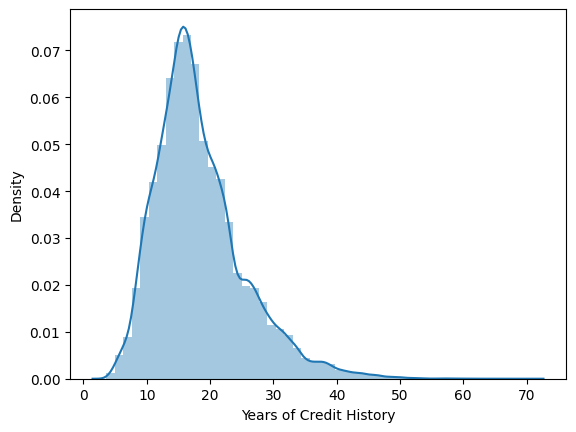

In [ ]:

data['Years of Credit History'].value_counts()


sns.distplot(data["Years of Credit History"])
#Over all looks pretty clean! no need of doing anything

## Months since last delinquent Feature EDA

In [ ]:
# Months since last delinquent Continuous features

data['Months since last delinquent'].describe()


count    40404.000000
mean        35.080289
std         22.008583
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [ ]:
#Lets check if there are any NA's
data['Months since last delinquent'].isna().sum()
#We have nearly 48506 NA


48506

## Number of Open Accounts Feature EDA

In [ ]:
# Number of open accounts 

data['Number of Open Accounts'].describe()
#The max number seems odd. Lets investigate


count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

<Axes: xlabel='Number of Open Accounts', ylabel='Density'>

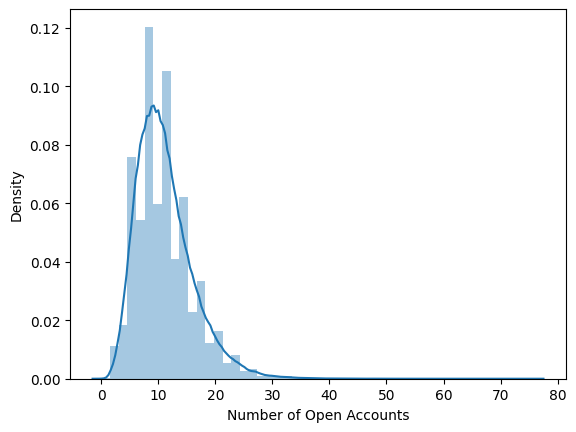

In [ ]:
sns.distplot(data['Number of Open Accounts'])
#Yes there are outliers Number of Open Accounts

In [ ]:
data['Number of Open Accounts'].quantile([0.75,0.999,1])
#Ok so replacing anything greater than 99th percentile with 99th percentile values


0.750    14.0
0.999    36.0
1.000    76.0
Name: Number of Open Accounts, dtype: float64

<Axes: xlabel='Number of Open Accounts', ylabel='Density'>

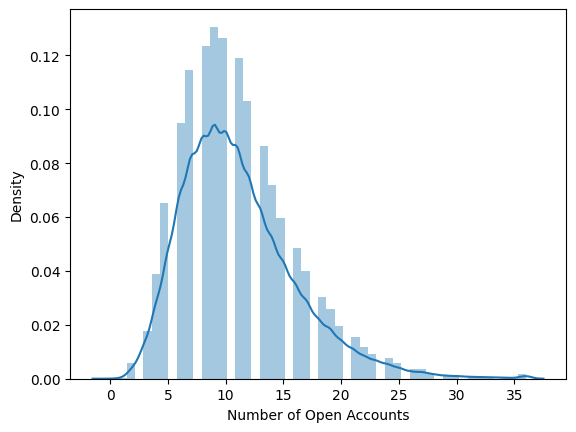

In [ ]:
# values greater than 36 replace with 36
data.loc[data['Number of Open Accounts'] > 36, 'Number of Open Accounts'] = 36


sns.distplot(data['Number of Open Accounts'])
#Looks good now


## Number of Credit problems Feature EDA

In [ ]:
# Number of Credit problems 

data['Number of Credit Problems'].describe() 

count    88910.000000
mean         0.160477
std          0.473746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Number of Credit Problems, dtype: float64

<Axes: xlabel='Number of Credit Problems', ylabel='Density'>

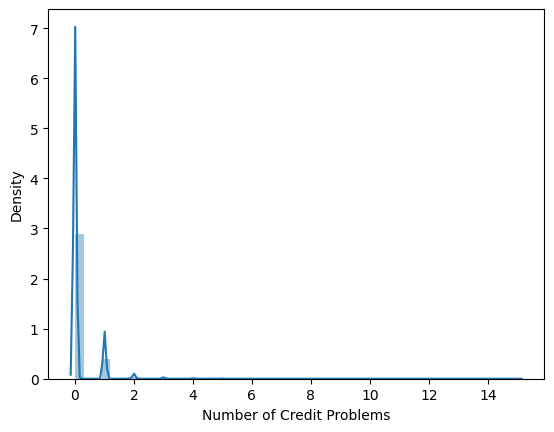

In [ ]:
# Max looks a bit higher.

sns.distplot(data['Number of Credit Problems'])

In [ ]:
data['Number of Credit Problems'].value_counts()

0     77057
1     10271
2      1092
3       311
4       101
5        46
6        14
7         6
9         4
10        3
8         2
12        1
15        1
11        1
Name: Number of Credit Problems, dtype: int64

## Current Credit Balance Feature EDA

In [ ]:
# Current Credit Balance 

data['Current Credit Balance'].describe()


count    8.891000e+04
mean     1.543593e+04
std      1.965873e+04
min      0.000000e+00
25%      5.949000e+03
50%      1.103900e+04
75%      1.930100e+04
max      1.730472e+06
Name: Current Credit Balance, dtype: float64

<Axes: xlabel='Current Credit Balance', ylabel='Density'>

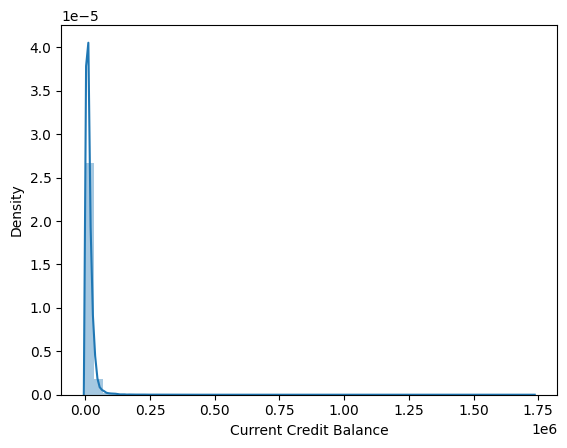

In [ ]:

sns.distplot(data['Current Credit Balance'])
#It seems there are outliers in this data. Lets investigate


In [ ]:
data['Current Credit Balance'].quantile([0.75,0.95,0.999,1])


0.750      19301.000
0.950      39933.300
0.999     227670.033
1.000    1730472.000
Name: Current Credit Balance, dtype: float64

In [ ]:
#lets dig deeper

data['Current Credit Balance'].quantile([0.95,0.96,0.97,0.98,0.99,1])


0.95      39933.30
0.96      43501.20
0.97      48507.73
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: Current Credit Balance, dtype: float64

<Axes: xlabel='Current Credit Balance', ylabel='Density'>

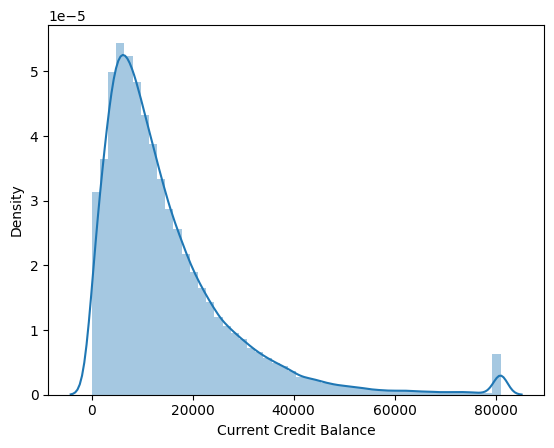

In [ ]:
# replace values greater than 0.99 th percentile with 81007.19 value

data.loc[data['Current Credit Balance'] > 81007, 'Current Credit Balance'] = 81007


sns.distplot(data['Current Credit Balance'])
#The plot doesnt look good. We need to transform it


<Axes: xlabel='Current Credit Balance', ylabel='Density'>

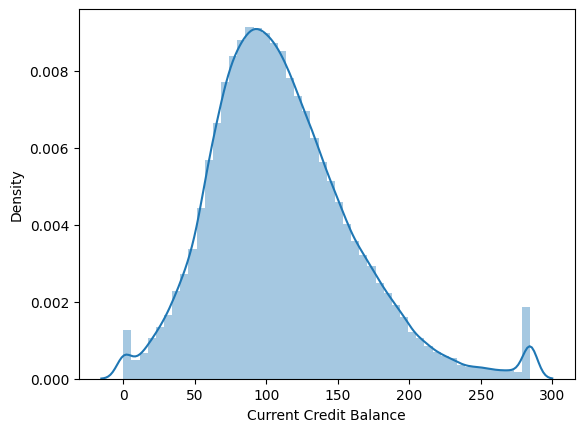

In [ ]:
# check any data transformation method
# square root, cube root and log transformation 

# Square root method use
sns.distplot(data['Current Credit Balance']**(1/2))

### A square root transformation can be useful for:

Procedure for converting a set of data in which each value, xi, is replaced by its square root

- Square root transformation for normalizing a skewed distribution
- Square root transformation for transforming a non-linear relationship into a linear one
- Reducing heteroscedasticity of the residuals in linear regression
- Square root transformation for clearer visualizations

In [ ]:
data['Current Credit Balance'] = data['Current Credit Balance']**(1/2)


## Max open credit Feature EDA

In [ ]:
# Max open credit 

data['Maximum Open Credit'].describe()


count     88910
unique    46625
top           0
freq        610
Name: Maximum Open Credit, dtype: object

In [ ]:
data['Maximum Open Credit'].value_counts()


0        610
10782     10
14382     10
17464     10
11044     10
        ... 
46635      1
25110      1
54780      1
42402      1
53374      1
Name: Maximum Open Credit, Length: 46625, dtype: int64

In [ ]:
#sns.distplot(data['Maximum Open Credit']) Error
#So there are some str characters present in the data. Lets find them
#could not convert string to float: '#VALUE!'


In [ ]:
#pd.to_numeric(data['Maximum Open Credit'])
#Unable to parse string "#VALUE!" at position 4930

In [ ]:
#Lets replace #value with Nan
data['Maximum Open Credit'] = data['Maximum Open Credit'].replace('#VALUE!', np.nan, regex=True)


In [ ]:
data['Maximum Open Credit'] = pd.to_numeric(data['Maximum Open Credit'])


In [ ]:
data['Maximum Open Credit'].isnull().sum()
#Now we have only 2 Nan;s in the data. 
# replace them with mean  


2

In [ ]:
data['Maximum Open Credit'].mean()

35965.310174562466

In [ ]:
data['Maximum Open Credit'] = data['Maximum Open Credit'].fillna(35965)


In [ ]:
data['Maximum Open Credit'].quantile([0.55,0.76,0.87,0.98,0.99,1])



0.55       24037.95
0.76       37259.84
0.87       50736.66
0.98      114682.56
0.99      171423.91
1.00    69988086.00
Name: Maximum Open Credit, dtype: float64

In [ ]:
# Replace the max outliers with 0.99th percentile
data.loc[data['Maximum Open Credit'] > 171423, 'Maximum Open Credit'] = 171423


<Axes: xlabel='Maximum Open Credit', ylabel='Density'>

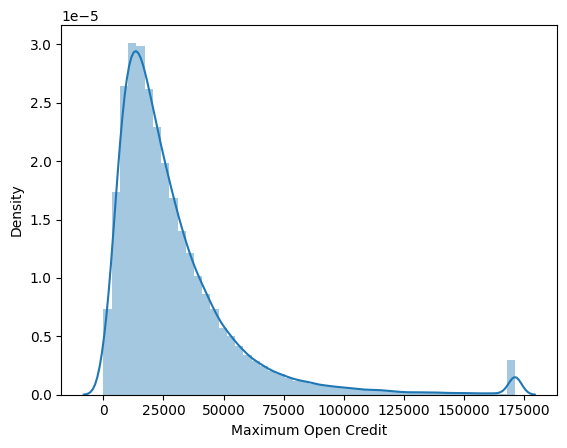

In [ ]:
sns.distplot(data['Maximum Open Credit']) 

## Bankruptcies Feature EDA

In [ ]:
# Bankruptcies 
data['Bankruptcies'].describe()


count    88718.000000
mean         0.112672
std          0.343300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [ ]:
data['Bankruptcies'].value_counts()


0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [ ]:
data['Bankruptcies'].value_counts().index

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 6.0], dtype='float64')

In [ ]:
import statistics
statistics.median([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 6.0])

3.5

In [ ]:
data['Bankruptcies'].unique()

#So we have Nan's. Lets fill them with median


array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [ ]:
data['Bankruptcies'].isna().sum()

192

In [ ]:
data['Bankruptcies'].mean()

0.11267161117247909

In [ ]:
data['Bankruptcies'] = data['Bankruptcies'].fillna(3)


<Axes: xlabel='Bankruptcies', ylabel='Density'>

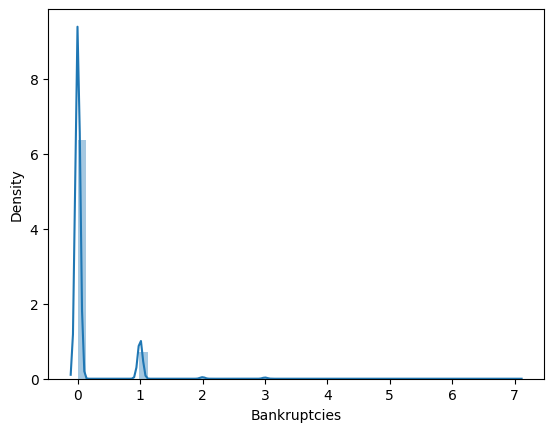

In [ ]:
sns.distplot(data['Bankruptcies']) 

## Tax Liens Feature EDA

In [ ]:
# Tax Liens

data['Tax Liens'].describe()


count    88902.000000
mean         0.028222
std          0.257533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64

In [ ]:
data['Tax Liens'].value_counts()



0.0     87274
1.0      1132
2.0       305
3.0        99
4.0        52
5.0        17
6.0         9
7.0         5
9.0         4
8.0         2
15.0        1
10.0        1
11.0        1
Name: Tax Liens, dtype: int64

In [ ]:
data['Bankruptcies'].unique()
# number of observations is not so high so we can ignore them

array([0., 1., 3., 2., 4., 5., 7., 6.])

## Imputation Of Missing Values

## Ordinality - Dummy Variables


- Ordinal Encoding
Value for every special category is allocated an integer number in ordinal encoding.
for example: “purple” equals 1, “blue” equals 2, and “orange” equals 3.

- Dummy Variable Encoding
A dummy variable representation is essential for some models, in addition to being significantly less redundant.

- One-hot encoding
The encoding can be inadequate at best for categorical variables with no ordinal relationship. Enabling the model for assumption of order among categories rather than forcing an ordinal relation through an ordinal encoding can lead to low performance or unexpected results.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88910 entries, 0 to 88909
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       88910 non-null  object 
 1   Customer ID                   88910 non-null  object 
 2   Loan Status                   88910 non-null  object 
 3   Current Loan Amount           88910 non-null  int64  
 4   Term                          88910 non-null  object 
 5   Credit Score                  88910 non-null  float64
 6   Years in current job          85093 non-null  object 
 7   Home Ownership                88910 non-null  object 
 8   Annual Income                 67572 non-null  float64
 9   Purpose                       88910 non-null  object 
 10  Monthly Debt                  88910 non-null  float64
 11  Years of Credit History       88910 non-null  float64
 12  Months since last delinquent  40404 non-null  float64
 13  N

In [ ]:
cat_cols = ['Term','Years in current job','Home Ownership','Purpose']

for c in cat_cols:
    data[c] = pd.factorize(data[c])[0]

In [ ]:
data[['Term','Years in current job','Home Ownership','Purpose']].head()

,Term,Years in current job,Home Ownership,Purpose
0,0,0,0,0
1,1,1,1,0
2,0,2,1,1
3,0,3,0,0
4,1,1,1,1


In [ ]:
#Imputing missing data with soft impute
updated_data=pd.DataFrame(data=SoftImpute().fit_transform(data[data.columns[3:19]],),\
                          columns=data[data.columns[3:19]].columns, \
                          index=data.index)


#Getting the dataset ready pd.get dummies function for dropping the dummy variables
df_LC = pd.get_dummies(updated_data, drop_first=True)

[SoftImpute] Max Singular Value of X_init = 23093178.728555
[SoftImpute] Iter 1: observed MAE=260.267050 rank=3
[SoftImpute] Iter 2: observed MAE=260.223447 rank=3
[SoftImpute] Iter 3: observed MAE=260.229275 rank=3
[SoftImpute] Iter 4: observed MAE=260.247793 rank=3
[SoftImpute] Iter 5: observed MAE=260.269172 rank=3
[SoftImpute] Iter 6: observed MAE=260.290642 rank=3
[SoftImpute] Iter 7: observed MAE=260.311324 rank=3
[SoftImpute] Iter 8: observed MAE=260.330859 rank=3
[SoftImpute] Iter 9: observed MAE=260.349252 rank=3
[SoftImpute] Iter 10: observed MAE=260.366362 rank=3
[SoftImpute] Iter 11: observed MAE=260.382276 rank=3
[SoftImpute] Iter 12: observed MAE=260.396916 rank=3
[SoftImpute] Iter 13: observed MAE=260.410387 rank=3
[SoftImpute] Iter 14: observed MAE=260.422661 rank=3
[SoftImpute] Iter 15: observed MAE=260.433791 rank=3
[SoftImpute] Iter 16: observed MAE=260.443797 rank=3
[SoftImpute] Iter 17: observed MAE=260.452806 rank=3
[SoftImpute] Iter 18: observed MAE=260.460949 ra

## Encoding Target Variable

In [ ]:

#Binarizing the Target variable
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(data['Loan Status'])
y=lb_results
y=y.ravel()

In [ ]:
lb_results.shape

(88910, 1)

In [ ]:
lb_style.get_params()

{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}

In [ ]:
y.shape

(88910,)

In [ ]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
lb_style.classes_

array(['Loan Given', 'Loan Refused'], dtype='<U12')

## Scaling the independent variables

In [ ]:
#Scaling the independent variables: standardized dataset scale all the data in same lavel scale
X_scaled = preprocessing.scale(df_LC)
print(X_scaled)
print('   ')
print(X_scaled.shape)

[[-0.1869176  -0.57302977  0.06886311 ... -0.79845518 -0.32295035
  -0.10958408]
 [ 1.48349848  1.74511004  0.26644983 ...  1.83825771 -0.32295035
  -0.10958408]
 [ 0.32079375 -0.57302977 -0.08920626 ... -0.53977375  2.39304617
  -0.10958408]
 ...
 [ 1.40247376 -0.57302977  0.78017528 ...  0.91232955 -0.32295035
  -0.10958408]
 [-1.1281112  -0.57302977 -0.16824094 ... -0.4039368  -0.32295035
  -0.10958408]
 [ 0.62515919 -0.57302977 -0.32631031 ... -0.30218149 -0.32295035
   3.77361205]]
   
(88910, 16)


## SPlit Data in Train and Validation

In [ ]:
# Looking at other models using different classifiers
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=22)

# ML Model for  Classification problems

- LogisticRegression():
An alternative regression machine learning algorithm is the logistic model. This technique is designed for binary classification problems, as indicated by two possible outcomes that are affected by one or more explanatory variables. 

Simple to interpret and versatile in its uses, logistic regression is ideal for applications where interpretability and inference are vital, such as fraud detection.

Advantages: Easy to implement and interpret. Suited well for a linearly separable dataset.

Disadvantages: An excessive amount of data creates a complex model that can lead to overfitting in high-dimensional datasets (number of features is higher than observations). Logistic regression assumes linearity between the dependent and independent variables.

---
- DecisionTreeClassifier():

This class of powerful machine learning algorithms is capable of achieving high levels of accuracy and is highly interpretable. Knowledge learned by a decision tree algorithm is expressed as a hierarchical structure, or “tree,” complete with various nodes and branches. 

Each decision node represents a question about the data, and the branches that stem from a node represent possible answers. A secondary type of node, which is less certain in its responses, is a chance node. An end node is indicated at the end of the decision-making process. 

Decision tree machine learning algorithms can be used to solve both classification and regression problems, often referred to as CART. A decision tree technique is useful at identifying trends. 

Advantages: Easy to explain. Does not require normalization or scaling of data.

Disadvantages: Can lead to overfitting. Affected by noise (distortions in the information can cause the algorithm to miss patterns in the data). Not suitable for large datasets.

---
- KNeighborsClassifier()

- XGBClassifier()

In [ ]:

def classify(est, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    est.fit(x, y)
    #Predicting the probabilities of the Tet data
    y2 = est.predict_proba(X_test)
    y1 = est.predict(X_test)

    print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))  # positive value is on second position..
    #Calculate different metrics
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(est, x, y))
    
    return est, y1, y2[:, 1]


#Function to find which features are more important than others through model
def feat_importance(estimator):
    feature_importance = {}
    for index, name in enumerate(df_LC.columns):
        feature_importance[name] = estimator.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)
    
    return sorted_x


## XGB classifier

[10:05:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.7265399467626439
Area under the ROC curve:  0.7390139167549737
F-metric:  0.37955086764205515
 
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82     18981
           1       0.55      0.29      0.38      7692

    accuracy                           0.73     26673
   macro avg       0.65      0.60      0.60     26673
weighted avg       0.70      0.73      0.70     26673

 
Evaluation by cross-validation:
[10:05:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10

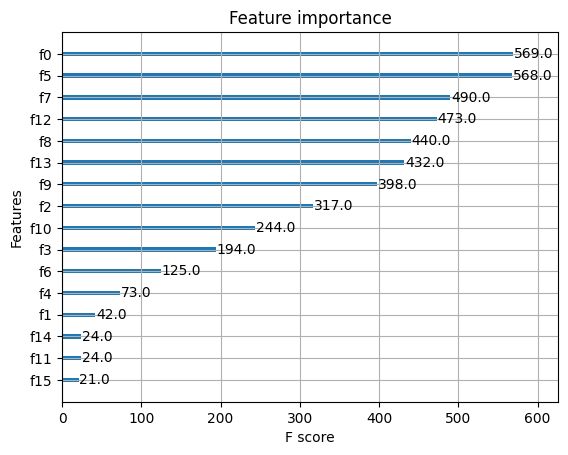

In [ ]:
#Finding accuracy and feature importance using XGB classifier
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train,X_test,y_test)
print(xgb0.feature_importances_)  # percentage of importance feature in data
plot_importance(xgb0)             # plot bar chart for Feature Importance
pyplot.show()

# each feature has f score, calculate F score for each of them to calculate 
# higher the F score greater the contribution...
feat1 = feat_importance(xgb0)


In [ ]:
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(n_estimators=47, learning_rate=0.015), X_train, y_train,X_test,y_test)

[10:08:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.727214786488209
Area under the ROC curve:  0.7375365142628465
F-metric:  0.32604668395702113
 
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     18981
           1       0.57      0.23      0.33      7692

    accuracy                           0.73     26673
   macro avg       0.66      0.58      0.58     26673
weighted avg       0.70      0.73      0.68     26673

 
Evaluation by cross-validation:
[10:08:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:

## K nearest Neighbour classifier

In [ ]:
# K nearest Neighbour classifier

knc, y_p, y_p2 = classify(KNeighborsClassifier(), X_train, y_train,X_test,y_test)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f670379e160>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so: cannot open shar

Accuracy:  0.6824129269298541
Area under the ROC curve:  0.6061661806865299
F-metric:  0.3130321952801881
 
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79     18981
           1       0.42      0.25      0.31      7692

    accuracy                           0.68     26673
   macro avg       0.58      0.55      0.55     26673
weighted avg       0.65      0.68      0.65     26673

 
Evaluation by cross-validation:
[0.69087404 0.69448907 0.69510725 0.69157227 0.68803728]


## Logistic Regression

In [ ]:

logit, y_p, y_p2 = classify(LogisticRegression(), X_train, y_train,X_test,y_test)

Accuracy:  0.7205413714242868
Area under the ROC curve:  0.6724794011517059
F-metric:  0.21338117349092448
 
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83     18981
           1       0.57      0.13      0.21      7692

    accuracy                           0.72     26673
   macro avg       0.65      0.55      0.52     26673
weighted avg       0.68      0.72      0.65     26673

 
Evaluation by cross-validation:
[0.72638175 0.73007712 0.72732385 0.72868964 0.72676147]


## Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
dtc, y_p, y_p2 = classify(DecisionTreeClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.649683200239943
Area under the ROC curve:  0.577180781241049
F-metric:  0.4005645368231973
 
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     18981
           1       0.40      0.41      0.40      7692

    accuracy                           0.65     26673
   macro avg       0.58      0.58      0.58     26673
weighted avg       0.65      0.65      0.65     26673

 
Evaluation by cross-validation:
[0.65857969 0.65769602 0.65622238 0.65790954 0.65678477]


# Class Imbalanced Problem

- 1: Loan refused
- 0: Loan Accept
---
- Recall value is getting Loan Refused
- Sensitivity is loan Refusal Rate

- Precision value is overall accuracy
- Spacificity is Loan Approval Rate
- Spacificity: How many correct number of 0 has been identify (correctly identify Loan Accepted record )



---
- this Problem focus on which model gives highest Spacificity along with good ROC curve

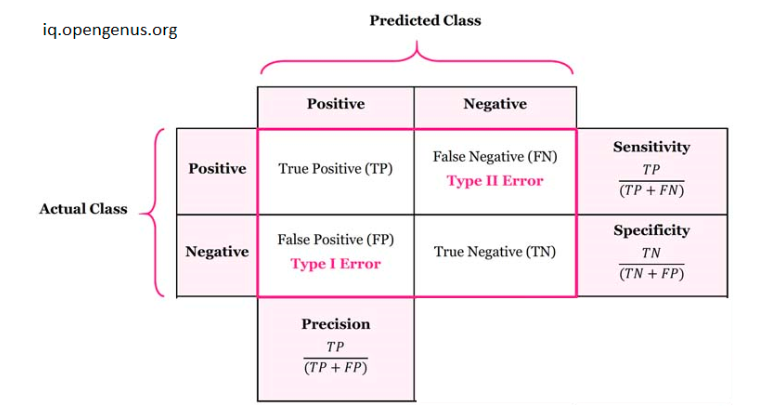

https://iq.opengenus.org/precision-recall-sensitivity-specificity/

In [ ]:

#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

## Check ML model for Non balancing the dataset

computing GradientBoosting - Non-balanced 
computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 
[11:02:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
computing XGBClassifier - Non-balanced 


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.239999,0.752540,0.568976,0.253195,0.350442,Non-balanced
1,LogisticRegression,0.160175,0.672862,0.557013,0.128705,0.209096,Non-balanced
2,RandomForestClassifier,0.201267,0.693094,0.513663,0.245159,0.331907,Non-balanced
3,XGBClassifier,0.233424,0.742983,0.537894,0.278619,0.367092,Non-balanced


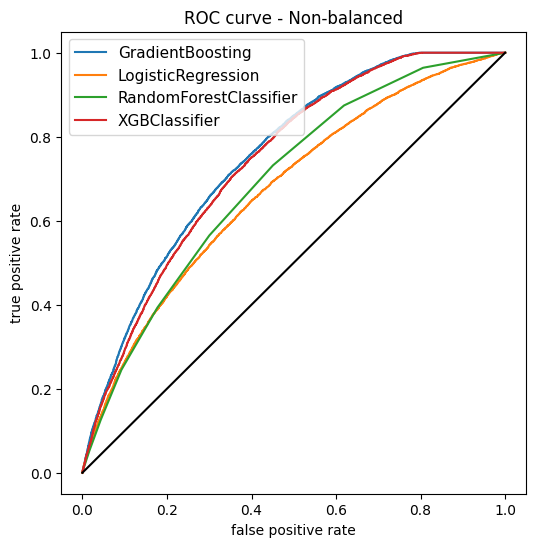

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')
models_report

Gradient Boosting is performing Better F1-score, (F1-score is also higher for XBGClassifier), Precision is also better for Gradient Boosting But we not look for Precision, ROC score and matthews_corrcoef is better so Final Model is Gradient Boosting...

In [ ]:
print(conf_matrix['GradientBoosting'])

Predicted      0     1
True                  
0          17626  1456
1           5669  1922


In [ ]:
print(conf_matrix['LogisticRegression'])

Predicted      0    1
True                 
0          18305  777
1           6614  977


In [ ]:
print(conf_matrix['RandomForestClassifier'])

Predicted      0     1
True                  
0          17320  1762
1           5730  1861


In [ ]:
print(conf_matrix['XGBClassifier'])

Predicted      0     1
True                  
0          17265  1817
1           5476  2115


## Check ML model for Synthetically balancing the dataset

computing GradientBoosting - Balanced 
computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 
[11:04:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
computing XGBClassifier - Balanced 


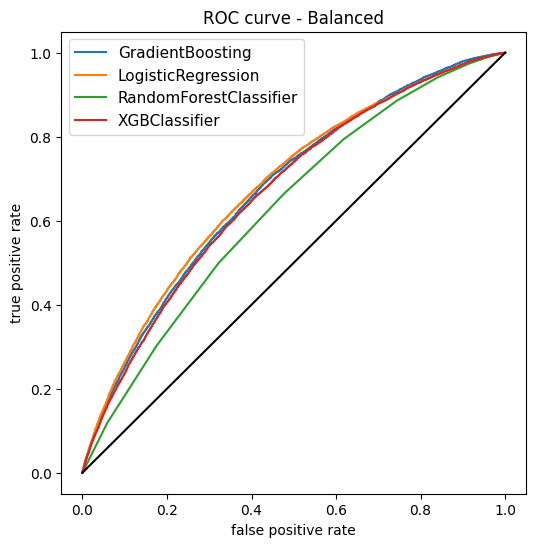

In [ ]:
## Synthetically balancing the dataset
index_split = int(len(X_scaled)/2)

X_train, y_train = SMOTE().fit_resample(X_scaled[0:index_split, :], y[0:index_split])
X_test, y_test = X_scaled[index_split:], y[index_split:]

models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

In [ ]:
models_report_bal

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.183341,0.676526,0.325500,0.905775,0.478902,Balanced
1,LogisticRegression,0.244472,0.682503,0.429439,0.546077,0.480785,Balanced
2,RandomForestClassifier,0.168335,0.629212,0.335836,0.794425,0.472097,Balanced
3,XGBClassifier,0.201844,0.669448,0.343733,0.836320,0.487216,Balanced


After Balanced Data, Logistic Regression gives Better F1-score Roc curve, matthews_corrcoef is better also..
When with the Balanced Data Logistic Regression is best model..

As we can see ROC curve is reduce as compare with Imbalance Data.

we creating model for unbalance Dataset 

ROC curve is best for Gradient Boosting in Imbalanced Data...

In [ ]:
print(conf_matrix_bal['GradientBoosting'])

Predicted     0      1
True                  
0          8335  23565
1          1183  11372


In [ ]:
print(conf_matrix_bal['RandomForestClassifier'])

Predicted      0      1
True                   
0          12175  19725
1           2581   9974


In [ ]:
print(conf_matrix_bal['XGBClassifier'])

Predicted      0      1
True                   
0          11853  20047
1           2055  10500


## save model

In [ ]:
# GBM model performed the best
# save model


gbm = GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3)
gbm.fit(X_scaled, y)
joblib.dump(gbm, 'GBM_Model_version1.pkl')


['GBM_Model_version1.pkl']

In [ ]:
# load model
gbm_pickle = joblib.load('GBM_Model_version1.pkl')

In [ ]:
gbm_pickle

GradientBoostingClassifier(max_depth=6, max_features=0.3)